#**Marriage**

###**source of the datasets :** https://population.un.org/MarriageData/Index.html#/maritalStatusData

###https://www.kaggle.com/data855/child-marriage

#**Libraries used**

Pandas

Matplotlib.pyplot

Numpy

OrderedDict

seaborn

Output_notebook,Show,Figure,ColumnDataSource

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, ColumnDataSource

In [ ]:
output_notebook()

#**Load the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/data/DVdataset.csv',encoding='utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.head() #it wii give the top 5 row of the dataset

,Country or area,ISO code,YearStart,YearEnd,Sex,MaritalStatus,Non-standard_AgeGroups,Series_contains_Non-standard_AgeGroups,AgeGroup,AgeStart,...,DataCatalog ShortName,DataCatalog ID,DataCatalog LongName,Data Source,Including_consensual_unions,Note on Age groups,Note on Marital Status,Note on Data,Note on Country and Population,Note Other
0,Afghanistan,4,1972,1974,Men,Divorced,NaN,NaN,[15-19],15,...,1972-1974 NDFGS,160,Afghanistan 1972-1974 National Demographic and...,National statistics,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,4,1972,1974,Men,Divorced,NaN,NaN,[20-24],20,...,1972-1974 NDFGS,160,Afghanistan 1972-1974 National Demographic and...,National statistics,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,4,1972,1974,Men,Divorced,NaN,NaN,[25-29],25,...,1972-1974 NDFGS,160,Afghanistan 1972-1974 National Demographic and...,National statistics,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,4,1972,1974,Men,Divorced,NaN,NaN,[30-34],30,...,1972-1974 NDFGS,160,Afghanistan 1972-1974 National Demographic and...,National statistics,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,4,1972,1974,Men,Divorced,NaN,NaN,[35-39],35,...,1972-1974 NDFGS,160,Afghanistan 1972-1974 National Demographic and...,National statistics,NaN,NaN,NaN,NaN,NaN,NaN


###**Now we are looking into the dataset,like Description,Info,Shape[No of rows and columns].**

In [ ]:
print(data.describe())
print(data.info())
print(data.shape)

            ISO code      YearStart        YearEnd  Non-standard_AgeGroups  \
count  253117.000000  253117.000000  253117.000000                  3771.0   
mean      444.442384    1995.619824    1995.715637                     1.0   
std       350.588962      13.781510      13.822294                     0.0   
min         4.000000    1954.000000    1955.000000                     1.0   
25%       233.000000    1985.000000    1985.000000                     1.0   
50%       422.000000    1998.000000    1999.000000                     1.0   
75%       646.000000    2008.000000    2008.000000                     1.0   
max     11578.000000    2016.000000    2016.000000                     1.0   

       Series_contains_Non-standard_AgeGroups       AgeStart         AgeEnd  \
count                                 14898.0  253117.000000  253117.000000   
mean                                      1.0      40.907738     105.938159   
std                                       0.0      18.873785

#**checking for missing values**

In [ ]:
data.isnull().sum()

Country or area                                0
ISO code                                       0
YearStart                                      0
YearEnd                                        0
Sex                                            0
MaritalStatus                                  0
Non-standard_AgeGroups                    249346
Series_contains_Non-standard_AgeGroups    238219
AgeGroup                                       0
AgeStart                                       0
AgeEnd                                         0
DataValue                                      0
DataProcess                                    0
DataCatalog ShortName                          0
DataCatalog ID                                 0
DataCatalog LongName                           0
Data Source                                    0
Including_consensual_unions               253117
Note on Age groups                        235556
Note on Marital Status                    249094
Note on Data        

#**pre-processing the dataset**

In [ ]:
df=data.drop(columns=['Non-standard_AgeGroups','Series_contains_Non-standard_AgeGroups','Including_consensual_unions','Note on Age groups','Note on Marital Status','Note on Data','Note on Country and Population','Note Other'])
df.shape #after preprocessing the dataset, the shape of the dataset is changed

(253117, 15)

In [ ]:
df['MaritalStatus'].value_counts()

Widowed                                          53482
Married                                          50387
Divorced                                         47780
Single                                           45799
Separated                                        16435
Consensual union                                 10074
Never married                                     9505
Divorced or Separated                             4819
Living together                                   4206
Not living together                               4111
Married or in consensual union                    2314
Married or married but separated                  1520
Currently not married                              607
Ever married                                       509
Widowed or divorced                                290
Consensual union, not living together              277
Married, in consensual unions or separated         196
Registred partnership                              175
Divorced o

###As u can see  in the above categories of marital status ,there are many of kinds , so we thought only 5 as important and we plotted for them.

In [ ]:
martial_status=data['MaritalStatus']    #assining the Martial status data to the variable

#counting the specific variable in a column and assining to the variables

Widowed=martial_status[martial_status[:]== 'Widowed'].count()
Married=martial_status[martial_status[:]== 'Married'].count()
Divorced=martial_status[martial_status[:]== 'Divorced'].count()
Single=martial_status[martial_status[:]== 'Single'].count()
Ever_married=martial_status[martial_status[:]== 'Ever married'].count()

status1={'Widowed':Widowed,'Married':Married,'Divorced':Divorced,'Single':Single,'Ever_married':Ever_married}    #creating the dictionary where it contains the variables as keys and count of it as values
status = OrderedDict(sorted(status1.items()))  #sorting the dictonary

keys=list(status.keys())    #extracting the variables(keys) as list and storing into another variable
items=list(status.values())  #extracting the values(items)  as list and storing into another variable
print(keys)
print(items)

['Divorced', 'Ever_married', 'Married', 'Single', 'Widowed']
[47780, 509, 50387, 45799, 53482]


In [ ]:
# Bokeh is an interactive visualization library for modern web browsers
x = ['Divorced', 'Ever_married','Married', 'Single', 'Widowed']

p = figure(plot_height = 400, plot_width = 400, x_range = x)
top = [47780, 509, 50387, 45799, 53482]
color = ['limegreen','red','skyblue','yellow','orange']

source = ColumnDataSource(dict(categories = x, top = top, color = color))
p.vbar(top = 'top', x = 'categories', width = 0.5, color = 'color',  source = source, alpha = 0.7)
show(p)

#**Observation**

> The data we plotted the chart tells us that there are more than 50000 cases of widowed i.e Fate as played very badly with many of them.

>And, the least (Nearer to 0) is Ever_married i.e There are less members are in the list of Ever Married


['DHS_HH', 'DHS_STATcompiler', 'Eurostat', 'GFHS', 'GGS', 'INED', 'IPUMS', 'MICS', 'MICS_HH', 'National statistics', 'PAPCHILD', 'PAPFAM', 'RHS', 'UNSD', 'US Census Bureau']
[15990, 18716, 2873, 440, 1832, 6987, 1474, 5744, 5838, 16819, 204, 352, 227, 167623, 7998]


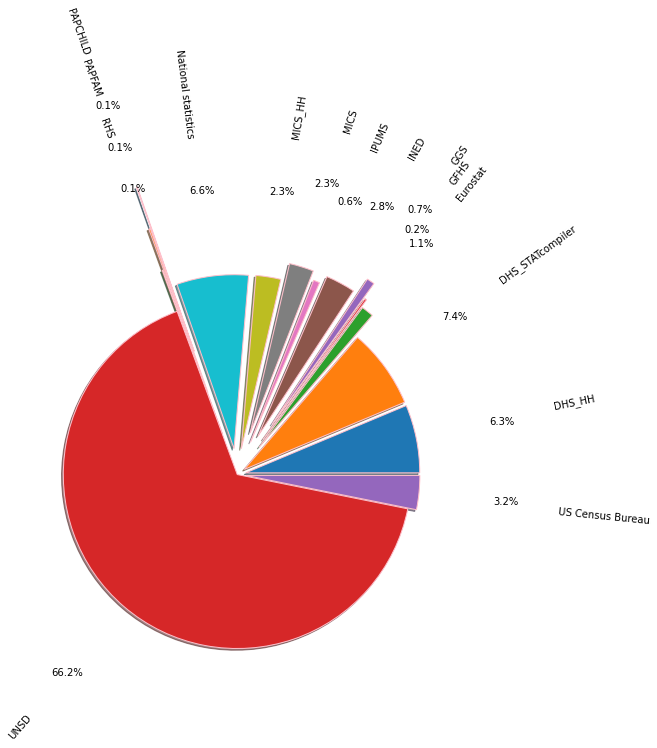

In [ ]:
DD=data.groupby('Data Source').count() #it will group the values(variables) in the column and counts it
datanames=list(DD.index)     #storing the index's in the form of list
datavalue=list(DD['Country or area']) #storing the count of values(variables) in the form of list
print(datanames)
print(datavalue)

#PieChart - A Pie Chart is a type of graph that displays data in a circular graph.
# each slice of the pie is relative to the size of that category
explode=[0.1,0.1,0.4,0.5,0.7,0.5,0.4,0.5,0.3,0.3,1.5,1,0.5,0,0.1]
plt.pie(datavalue, labels=datanames,explode=explode,shadow=True,radius=2, autopct="%0.1f%%",pctdistance=1.5,labeldistance=1.8,rotatelabels = 135, wedgeprops={'edgecolor':'pink'})
#plt.title("Data Sources where the data collected")
plt.show()

<pre>
  DHS_HH             =  Demographic and Health Survey, Household Data
  DHS_STATcompiler   = Demographic and Health Survey, STATcompiler
  Eurostat           = Statistical office of the European Union
  GFHS               = Gulf Family Health Survey
  GGS                = Generations and Gender Survey
  INED               = Institut National d'Études Démographiques
  IPUMS              = Integrated Public Use Microdata Series
  MICS               = Multiple Indicator Cluster Survey
  MICS_HH            = Multiple Indicator Cluster Survey, Household Data
  National statistics = National Statistics Office
  PAPCHILD           = Pan-Arab Project for Child Development Survey
  PAPFAM             = Pan-Arab Project for Family Health Survey
  RHS               = Reproductive Health Survey
  UNSD              = United Nations Statistics Division
  US Census Bureau  = United States Census Bureau

#**Observation**
> The plot which is plotted gives the information about the Data Source that the Most ( i.e 66.2% ) of data is collected from 'UNSD' ,Where as the least ( i.e  0.1% ) data is from 'PAPCHILD', 'PAPFAM', 'RHS'


the countries names are
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Channel Islands'
 'Chile' 'China' 'China, Hong Kong SAR' 'China, Macao SAR'
 'China, Taiwan Province of China' 'Colombia' 'Comoros' 'Congo'
 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czechia'
 "Côte d'Ivoire" "Dem. People's Rep. of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'


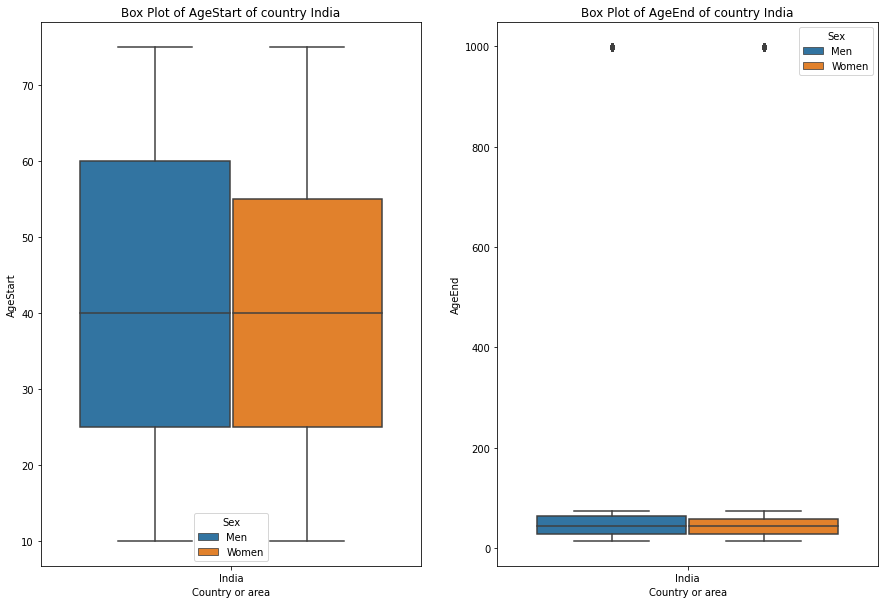

In [ ]:
#boxplot - known as the box and whisker plot.
#It shows the distribution of the quantitative data that represents the comparisons between variables

countries=df['Country or area']
x = np.array(list(countries))
print("the countries names are")
print(np.unique(x))

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,10))

countryname=input("enter the country name from the above list for which you want to the plot")
datadf=df[df['Country or area'] == countryname][['Country or area','AgeStart','AgeEnd','Sex']]

sns.boxplot(x ='Country or area', y ='AgeStart', data = datadf, ax=ax[0],hue ='Sex').set_title('Box Plot of AgeStart of country {}'.format(countryname))
sns.boxplot(x ='Country or area', y ='AgeEnd', data = datadf, ax=ax[1],hue ='Sex').set_title('Box Plot of AgeEnd of country {}'.format(countryname))

#Hue - Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

plt.show()

#**Observation**


>As we see in the above chart age start in India is from 25 for both men and women
And it is till 60 .In the age end plot  it is in range of 25-60. Both plot have outliers and this plot varies from one country to other.

> **NOTE**

> we can observe the box plot for different countries as your wish . Since we had give INDIA ,So, As per that we had written the observation for the plot

In [ ]:
cdata = pd.read_csv('/content/drive/My Drive/Child-marriage-database.csv',encoding='utf8')
cdata.head()

,Country,Female Married by 15,Female Married by 18,Reference year,Data source,Male Married by 18,Male Reference year,Data source.1
0,Afghanistan,4.0,28.0,2017.0,ALCS 2016-17,7.0,2015.0,DHS 2015
1,Albania,1.0,12.0,2018.0,DHS 2017-18,1.0,2018.0,DHS 2017-18
2,Algeria,0.0,3.0,2013.0,MICS 2012-13,NaN,NaN,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,8.0,30.0,2016.0,DHS 2015-16,6.0,2016.0,DHS 2015-16


#**Dealing with Categorical features(handling missing data)**

In [ ]:
# categorical features
categorical_feat = [feature for feature in cdata.columns if cdata[feature].dtypes=='O']
print('Total categorical features: ', len(categorical_feat))
print('\n',categorical_feat)

Total categorical features:  3

 ['Country ', 'Data source', 'Data source.1']


In [ ]:
# categorical features with missing values
categorical_nan = [feature for feature in cdata.columns if cdata[feature].isna().sum()>1 and cdata[feature].dtypes=='O']
print(categorical_nan)

['Data source', 'Data source.1']


In [ ]:
cdata[categorical_nan].isna().sum()

Data source       74
Data source.1    107
dtype: int64

In [ ]:
# replacing missing values in categorical features
for feature in categorical_nan:
    cdata[feature] = cdata[feature].fillna('None')

cdata[categorical_nan].isna().sum()

Data source      0
Data source.1    0
dtype: int64

#**Dealing with Numerical features(handling missing data)**

In [ ]:
# Lets first handle numerical features with nan value
numerical_nan = [feature for feature in cdata.columns if cdata[feature].isna().sum()>1 and cdata[feature].dtypes!='O']
print(numerical_nan)

cdata[numerical_nan].isna().sum()

['Female Married by 15', 'Female Married by 18', 'Reference year', 'Male Married by 18', 'Male Reference year']


Female Married by 15     74
Female Married by 18     74
Reference year           74
Male Married by 18      107
Male Reference year     107
dtype: int64

In [ ]:
## Replacing the numerical Missing Values

for feature in numerical_nan:
    ## We will replace by using median since there are outliers
    median_value=cdata[feature].median()

    cdata[feature].fillna(median_value,inplace=True)

cdata[numerical_nan].isnull().sum()

Female Married by 15    0
Female Married by 18    0
Reference year          0
Male Married by 18      0
Male Reference year     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


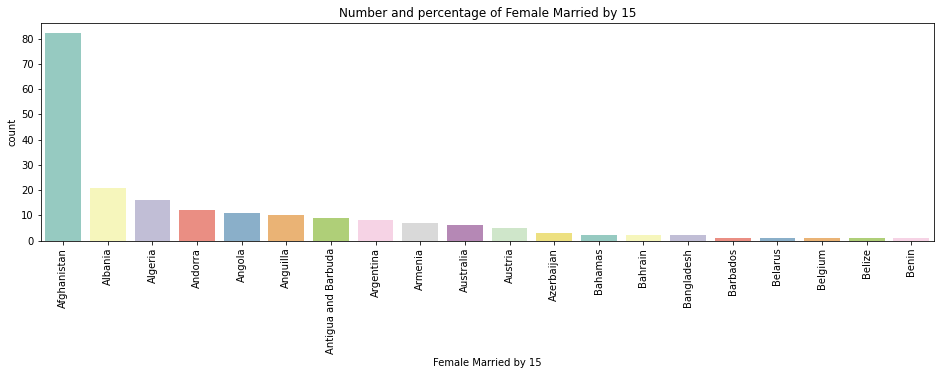

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


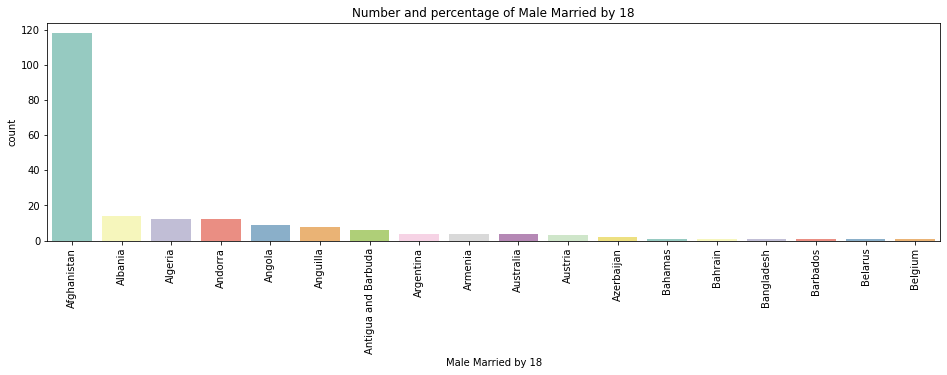

In [ ]:
def plot_count(feature, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(cdata))
    g = sns.countplot(cdata[feature], order = cdata[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
         ax.set_xticklabels(cdata['Country '].unique().astype(str), rotation='vertical')


    plt.show()
plot_count("Female Married by 15", "Female Married by 15", cdata,4)
plot_count("Male Married by 18", "Male Married by 18", cdata,4)

##**Observation:**
> As per the above chart the high percent marriages are from the country Afghanisthan (i.e more than 80 "Females Married below 15"  And more than 110 "Male Married below 18" )

>It seems the child marriages are more occured in Afganisthan

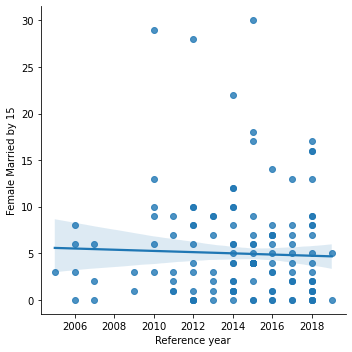

In [ ]:
fig=sns.lmplot(x='Reference year', y="Female Married by 15",data=cdata)

#**observation**
> In the above plot,we can see most marriages occured in 2018

 >But,At OneTime the number of marriages occured in 2015 had reached more than 30

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


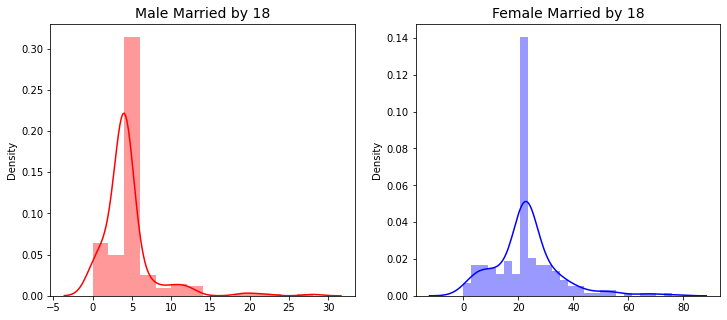

In [ ]:
#DistPlot - A distplot plots a univariate distribution of observations.
#The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.


cdata = cdata.rename(columns={'Female Married by 15':'fmarried15', 'Female Married by 18': 'fmarried18', 'Male Married by 18': 'mMarried18'})


# Distribution of different type of amount
fig , ax = plt.subplots(1,2,figsize = (12,5))

mMarried18 = cdata.mMarried18.values
fmarried18 = cdata.fmarried18.values

sns.distplot(mMarried18 , ax = ax[0] , color = 'red').set_title('Male Married by 18' , fontsize = 14)
sns.distplot(fmarried18 , ax = ax[1] , color = 'blue').set_title('Female Married by 18' , fontsize = 14)



plt.show()

#**Observation**

>In the left side dist plot the count 5 is the mostly repeated in all the countries where Male is married by 18

>In the right side dist plot the count 21 is the mostly repeated in all the countries where Female is married by 18


<br>


</br>

#**Conclusion**

**From the whole Project,**

<pre><b>            First thing there are less datasets of marriage and they also contain little knowledge.
            We tried our best to present the data which can be useful to get insights.
            Major child marriage occuured in Afghanistan,And
            There are cases where marriages occured at 60 also .
            So, Age doesn't matter in case of getting married.It is just a Number.
</b></pre>

